## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
print("Distinct Mouse IDs in mouse metadata = %d." % mouse_metadata["Mouse ID"].count())
print("Distinct Mouse IDs in study results = %d."  % len(study_results["Mouse ID"].unique()) )
merged_data = pd.merge(mouse_metadata, study_results, on="Mouse ID" )
# Display the data table for preview
merged_data


Distinct Mouse IDs in mouse metadata = 249.
Distinct Mouse IDs in study results = 249.


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
print("Merged df has %d distinct mice.\n" % len(merged_data["Mouse ID"].unique()))

Merged df has 249 distinct mice.



In [3]:
# Getting the duplicate records by Mouse ID and Timepoint.
#study_results[study_results.duplicated(["Mouse ID","Timepoint"],keep=False)]
merged_data.set_index(["Mouse ID"]) 
merged_data[merged_data.duplicated (subset=["Mouse ID","Timepoint"],keep=False)].loc[:, ["Mouse ID","Timepoint"]]

,Mouse ID,Timepoint
908,g989,0
909,g989,0
910,g989,5
911,g989,5
912,g989,10
913,g989,10
914,g989,15
915,g989,15
916,g989,20
917,g989,20


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
merged_data[merged_data.duplicated (subset=["Mouse ID","Timepoint"],keep=False)]



,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
merged_data.drop_duplicates(subset=["Mouse ID","Timepoint"],keep=False,inplace=True)


In [6]:
# Checking the number of mice in the clean DataFrame.
print("After removing dups, merged df has %d distinct mice.\n" % len(merged_data["Mouse ID"].unique()))
print("Duplicates have been removed.  There are no repeated values for Mouse ID and Timepoint:")
merged_data = merged_data.set_index("Mouse ID")
merged_data.loc["g989"]

After removing dups, merged df has 249 distinct mice.

Duplicates have been removed.  There are no repeated values for Mouse ID and Timepoint:


,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,
g989,Propriva,Female,21,26,25,56.045564,1
g989,Propriva,Female,21,26,30,59.082294,1
g989,Propriva,Female,21,26,35,62.570880,2


In [7]:
merged_data = merged_data.reset_index()
print("There should be no duplicate records, based on Mouse ID and Timepoint:")
merged_data[merged_data.duplicated (subset=["Mouse ID","Timepoint"],keep=False)].loc[:, ["Mouse ID","Timepoint"]]

There should be no duplicate records, based on Mouse ID and Timepoint:


,Mouse ID,Timepoint


## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# maker_group = used_car_df.groupby('maker')
regimen_group    = merged_data.groupby('Drug Regimen') 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
regimen_mean     = regimen_group["Tumor Volume (mm3)"].mean()
regimen_median   = regimen_group["Tumor Volume (mm3)"].median()
regimen_variance = regimen_group["Tumor Volume (mm3)"].var()
regimen_stdev    = regimen_group["Tumor Volume (mm3)"].std()
regimen_sem      = regimen_group["Tumor Volume (mm3)"].sem()

#print(regimen_group ,regimen_mean,regimen_median,regimen_variance,regimen_stdev )

# Assemble the resulting series into a single summary dataframe.
regimen_results = pd.DataFrame(
                               {   "Regimen Mean"    : regimen_mean,
                                   "Regimen Median"  : regimen_median,
                                   "Regimen Variance": regimen_variance, 
                                   "Regimen Std Dev" : regimen_stdev,
                                   "Regimen SEM"     : regimen_sem
                               }
                              )
regimen_results

,Regimen Mean,Regimen Median,Regimen Variance,Regimen Std Dev,Regimen SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.458254,50.854632,44.053659,6.637293,0.540135
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

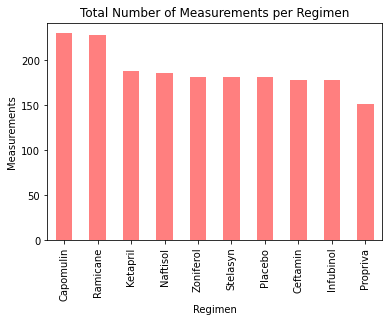

In [9]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
#num_of_measurements = merged_data.groupby('Drug Regimen').count()
regimen_counts_df = pd.DataFrame(merged_data["Drug Regimen"].value_counts())
regimen_chart = regimen_counts_df.plot(kind="bar",color='r', alpha=0.5, align="center", \
                                           title="Total Number of Measurements per Regimen",\
                                           legend=False)
plt.xlabel("Regimen")
plt.ylabel("Measurements")
plt.show()

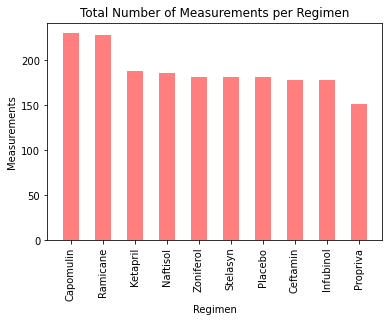

In [10]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
regimen_counts  = merged_data["Drug Regimen"].value_counts()
x_values = regimen_counts.index
y_values = regimen_counts.values
plt.bar(x_values, y_values, color='r', alpha=0.5, align="center" , width=0.5)
x_axis = np.arange(len(x_values))
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, x_values, rotation=90)
plt.title("Total Number of Measurements per Regimen")
plt.xlabel("Regimen")
plt.ylabel("Measurements")
plt.show()

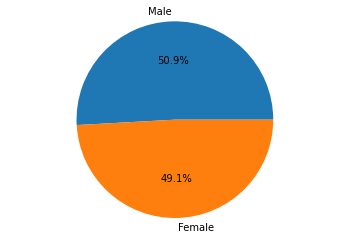

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
sex_counts = merged_data["Sex"].value_counts()
sex_counts_df = pd.DataFrame(sex_counts)

sex_pie_chart = sex_counts_df.plot(kind="pie", y="Sex", autopct="%1.1f%%", legend=False)
sex_pie_chart.set_ylabel(None)
plt.axis("equal")
plt.show()


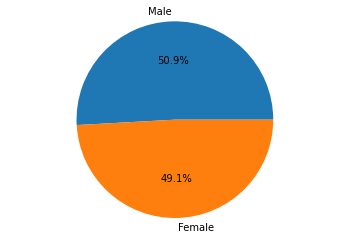

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = sex_counts.index
counts = sex_counts.values
plt.pie(counts, labels=labels, autopct="%1.1f%%")
plt.axis("equal")
plt.show()



## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
id_group  = merged_data.groupby('Mouse ID') 
max_timepoint_df = pd.DataFrame(id_group["Timepoint"].max())

#["Tumor Volume (mm3)"]


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
max_volumes_df = pd.merge(max_timepoint_df, merged_data, on="Mouse ID")

# Only select records where the timepoint equals the max timepoint
max_volumes_df = max_volumes_df[max_volumes_df["Timepoint_x"] == max_volumes_df["Timepoint_y"]]

#Rename timepoint and Tumor Volume Columns
max_volumes_df = max_volumes_df.rename(columns={"Timepoint_y":"Max Timepoint",
                                               "Tumor Volume (mm3)":"Max Tumor Volume (mm3)"}
                                      )

#Drop the duplicate timepoint column
max_volumes_df = max_volumes_df.drop(labels="Timepoint_x", axis=1)

# Only include records in the specified treatment regimens
max_volumes_df = max_volumes_df[max_volumes_df["Drug Regimen"].isin(["Capomulin", "Ramicane", "Infubinol","Ceftamin"])]


In [24]:
#fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
max_volumes_df[max_volumes_df["Drug Regimen"] == "Ramicane"].loc[:,"Max Tumor Volume (mm3)"]

66      38.407618
76      43.047543
99      38.810366
116     32.978522
292     38.342008
329     33.397653
388     37.311236
453     40.659006
581     29.128472
618     33.562402
628     36.374510
749     31.560470
769     36.134852
799     22.050126
969     30.564625
1031    31.095335
1250    45.220869
1258    36.561652
1329    37.225650
1340    43.419381
1409    30.276232
1504    40.667713
1672    43.166373
1793    44.183451
1852    30.638696
Name: Max Tumor Volume (mm3), dtype: float64

Infubinol
---------
The lower quartile of tumor sizes is: 54.05
The upper quartile of tumor sizes is: 65.53
The interquartile range of tumor sizes is: 11.48
The the median of tumor sizes is: 60.17 
Values below 36.83 could be outliers.
Values above 82.74 could be outliers.


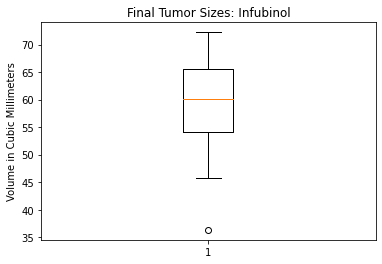

Ceftamin
--------
The lower quartile of tumor sizes is: 48.72
The upper quartile of tumor sizes is: 64.30
The interquartile range of tumor sizes is: 15.58
The the median of tumor sizes is: 59.85 
Values below 25.36 could be outliers.
Values above 87.67 could be outliers.


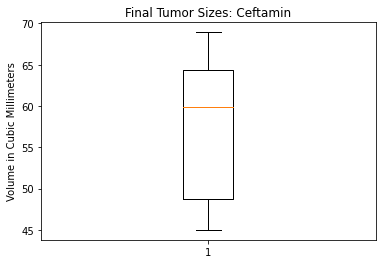

Ramicane
--------
The lower quartile of tumor sizes is: 31.56
The upper quartile of tumor sizes is: 40.66
The interquartile range of tumor sizes is: 9.10
The the median of tumor sizes is: 36.56 
Values below 17.91 could be outliers.
Values above 54.31 could be outliers.


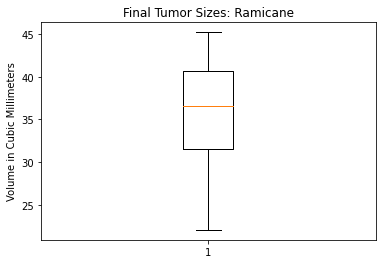

Capomulin
---------
The lower quartile of tumor sizes is: 32.38
The upper quartile of tumor sizes is: 40.16
The interquartile range of tumor sizes is: 7.78
The the median of tumor sizes is: 38.13 
Values below 20.70 could be outliers.
Values above 51.83 could be outliers.


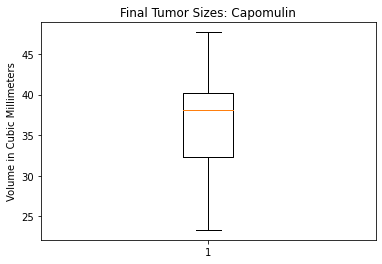

In [35]:

# Put treatments into a list for for loop (and later for plot labels)
treatments = max_volumes_df["Drug Regimen"].unique()
treatments

#for each treatment, fill the list of tumor voulumes, calculate the IQR and outliers, and add the box plot.

for the_treatment in treatments:
    # Create empty list to fill with tumor vol data (for plotting)
    tumor_volumes = max_volumes_df[max_volumes_df["Drug Regimen"] == the_treatment].loc[:,"Max Tumor Volume (mm3)"]
    
    tumor_volumes_s = pd.Series(tumor_volumes)

    # Calculate the IQR and quantitatively determine if there are any potential outliers. 
    quartiles = tumor_volumes_s.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq

    print(the_treatment)
    print("-"*len(the_treatment))
    print(f"The lower quartile of tumor sizes is: {lowerq:.2f}")
    print(f"The upper quartile of tumor sizes is: {upperq:.2f}")
    print(f"The interquartile range of tumor sizes is: {iqr:.2f}")
    print(f"The the median of tumor sizes is: {quartiles[0.5]:.2f} ")
    
    # Determine outliers using upper and lower bounds
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f"Values below {lower_bound:.2f} could be outliers.")
    print(f"Values above {upper_bound:.2f} could be outliers.")
    
    # Generate a box plot of the final tumor volume of each mouse across four regimens of interest
    fig1, ax1 = plt.subplots()
    ax1.set_title('Final Tumor Sizes: ' + the_treatment)
    ax1.set_ylabel('Volume in Cubic Millimeters')
    ax1.boxplot(tumor_volumes_s)
    plt.show()
    

## Line and Scatter Plots

In [ ]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [ ]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
